In [36]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from glob import glob
import PIL
from PIL import Image
import os

In [2]:
#Read the metadata file
df = pd.read_csv('metadata.csv')
df.head()

,image_id,lesion_type,confirmation,age,sex,localization
0,IMAGE_0000244,0,histo,80.0,male,scalp
1,IMAGE_0001916,0,histo,80.0,male,scalp
2,IMAGE_0006461,0,histo,80.0,male,scalp
3,IMAGE_0003197,0,histo,80.0,male,scalp
4,IMAGE_0009907,0,histo,75.0,male,ear


In [3]:
#Check the number of rows and columns
df.shape

(10015, 6)

In [4]:
#Define paths to folders containing training and validation images 
image_folder_paths = ['/Users/arberite/Desktop/Assigment/dataset/images/train', '/Users/arberite/Desktop/Assigment/dataset/images/validation']

In [5]:
#Initialize a dictionary to hold image_id:image_path pairs
image_id_to_path = {}
for folder_path in image_folder_paths:
    for image_file in os.listdir(folder_path):
        image_id = image_file.split('.')[0]  
        image_path = os.path.join(folder_path, image_file)
        image_id_to_path[image_id] = image_path

In [6]:
#Define a dictionary to map lesion types (integer values) to their names (string values)
lesion_name = {
    0: 'Benign keratosis-like lesions',
    1: 'Melanocytic nevi',
    2: 'Dermatofibroma',
    3: 'Melanoma',
    4: 'Vascular lesions',
    5: 'Basal cell carcinoma',
    6: 'Actinic keratoses'
   }

In [7]:
#Add two columns to the DataFrame by mapping 'image_id' and 'lesion_type' to 'image path' and 'lesion_name'
df['lesion_name'] = df['lesion_type'].map(lesion_name.get)
df['image_path'] = df['image_id'].map(image_id_to_path)
df.head()

,image_id,lesion_type,confirmation,age,sex,localization,lesion_name,image_path
0,IMAGE_0000244,0,histo,80.0,male,scalp,Benign keratosis-like lesions,/Users/arberite/Desktop/Assigment/dataset/imag...
1,IMAGE_0001916,0,histo,80.0,male,scalp,Benign keratosis-like lesions,/Users/arberite/Desktop/Assigment/dataset/imag...
2,IMAGE_0006461,0,histo,80.0,male,scalp,Benign keratosis-like lesions,/Users/arberite/Desktop/Assigment/dataset/imag...
3,IMAGE_0003197,0,histo,80.0,male,scalp,Benign keratosis-like lesions,/Users/arberite/Desktop/Assigment/dataset/imag...
4,IMAGE_0009907,0,histo,75.0,male,ear,Benign keratosis-like lesions,/Users/arberite/Desktop/Assigment/dataset/imag...


In [8]:
#Drop any rows with missing 'image_path'- because the DataFrame contains data from the train set
df = df.dropna(subset=['image_path'])

In [9]:
#Check for null values
df.isna().sum()

image_id         0
lesion_type      0
confirmation     0
age             53
sex              0
localization     0
lesion_name      0
image_path       0
dtype: int64

In [10]:
#Fill missing 'age' values with the mean age
df['age'].fillna((df['age'].mean()), inplace=True)

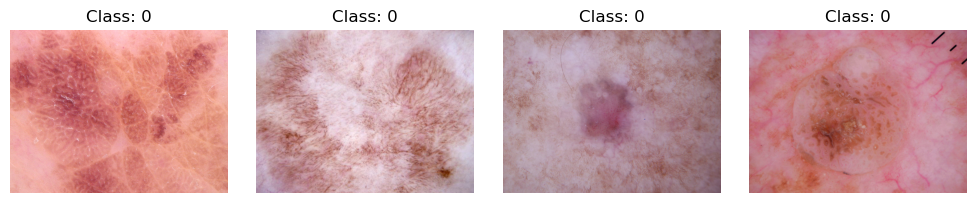

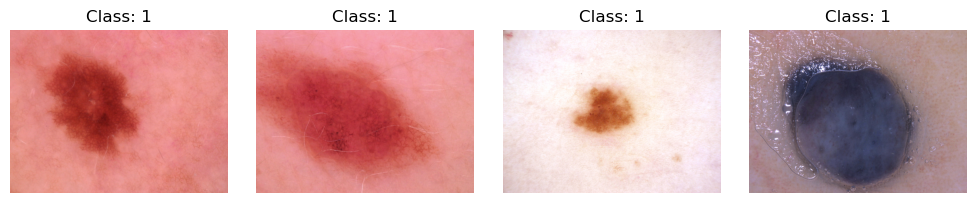

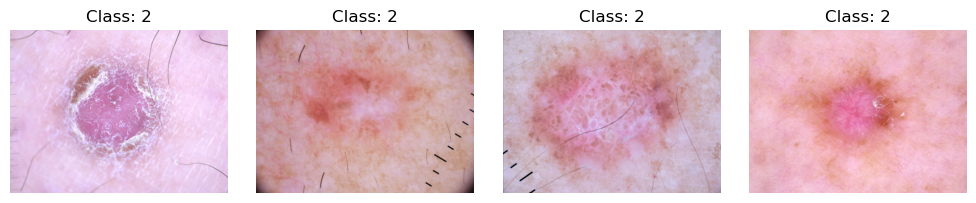

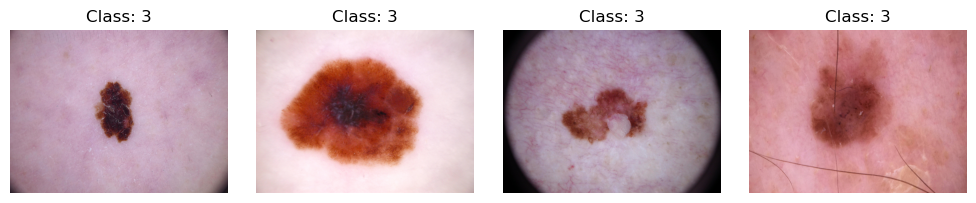

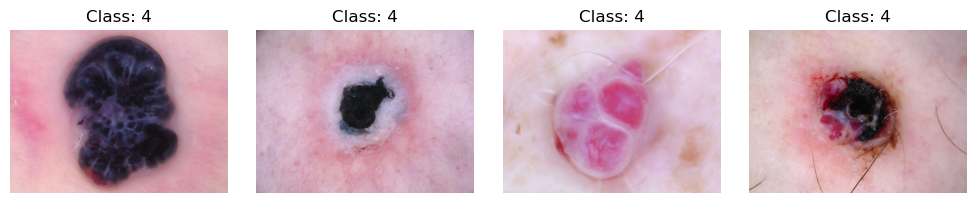

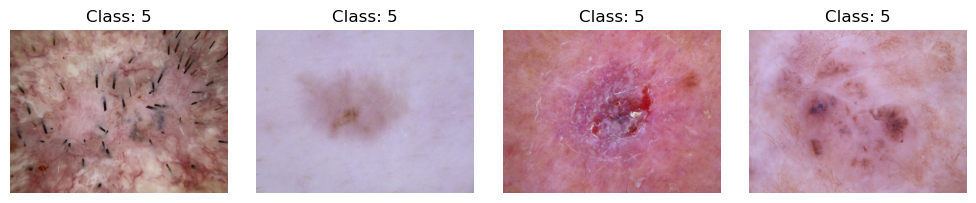

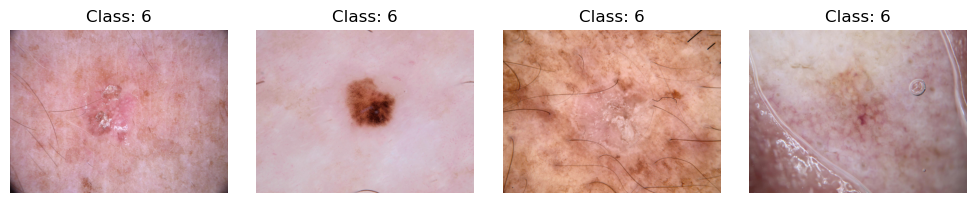

In [11]:
image_paths = df['image_path']
class_labels = df['lesion_type']

#Function to load and display random images
def display_images(image_paths, class_labels, num_images=4):
    #Create a random index array to select random images
    random_indices = np.random.choice(len(image_paths), num_images, replace=False)
    
    # Plot the images in a grid
    fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
    
    for i, idx in enumerate(random_indices):
        img_path = image_paths.iloc[idx]
        img_class = class_labels.iloc[idx]
        
        # Load the image using PIL 
        img = Image.open(img_path)
        
        # Display the image
        axes[i].imshow(img)
        axes[i].set_title(f'Class: {img_class}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

#Set the number of images to display per class - 4 images for row in this case
num_images_per_class = 4

#Display random images from each class
unique_classes = class_labels.unique()
for img_class in unique_classes:
    class_indices = np.where(class_labels == img_class)[0]
    random_indices = np.random.choice(class_indices, num_images_per_class, replace=False)
    display_images(image_paths.iloc[random_indices], class_labels.iloc[random_indices])

In [12]:
#Get the counts of each lesion type
lesion_distribution = df['lesion_name'].value_counts()
lesion_distribution = lesion_distribution.sort_values(ascending=False)

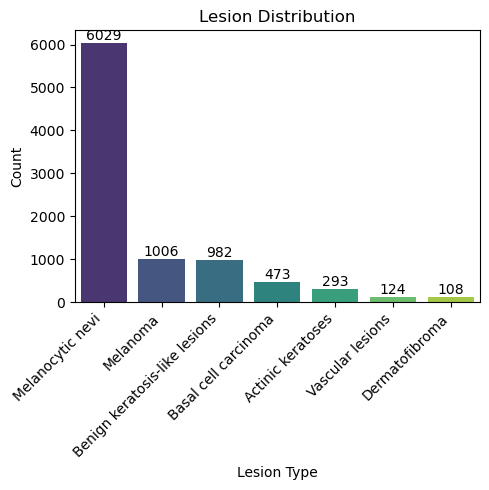

In [13]:
#Plot the distribution of lesion types
plt.figure(figsize=(5, 5))
ax=sns.barplot(x=lesion_distribution.index, y=lesion_distribution.values, palette='viridis')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Lesion Type')
plt.ylabel('Count')
plt.title('Lesion Distribution')

for i, count in enumerate(lesion_distribution.values):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [14]:
#Get the counts of each localization
localization = df['localization'].value_counts()
localization = localization.sort_values(ascending=False)

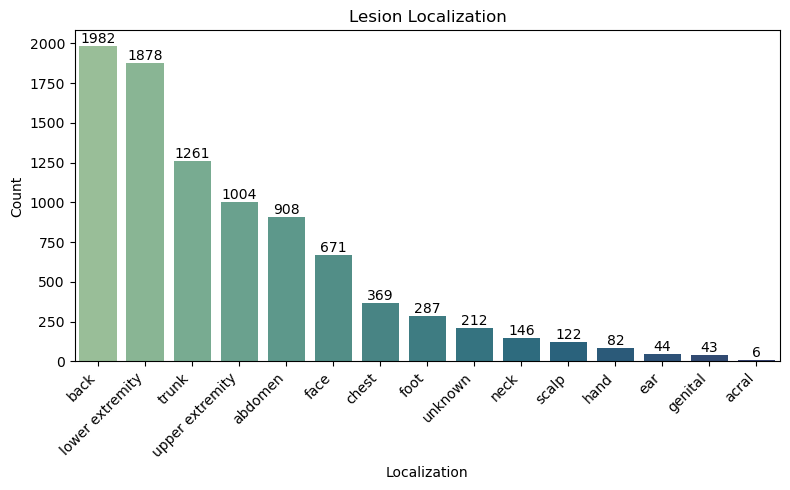

In [15]:
#Plot the distribution of localization
plt.figure(figsize=(8, 5))
ax=sns.barplot(x=localization.index, y=localization.values, palette='crest')
plt.xticks(rotation=45, ha='right')  
plt.xlabel('Localization')
plt.ylabel('Count')
plt.title('Lesion Localization')

for i, count in enumerate(localization.values):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

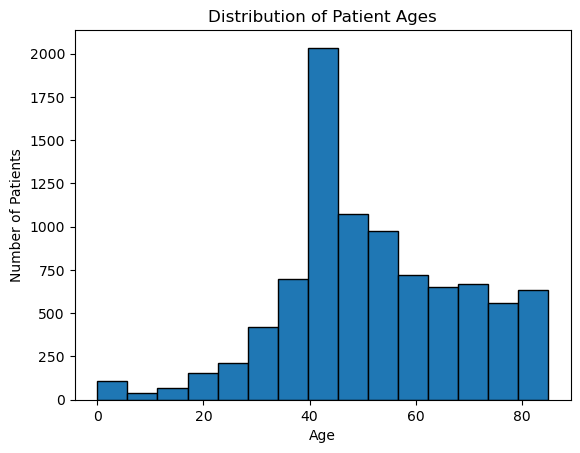

In [16]:
#Plot a histogram of patient ages
plt.hist(df['age'], bins=15, edgecolor='black') 
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

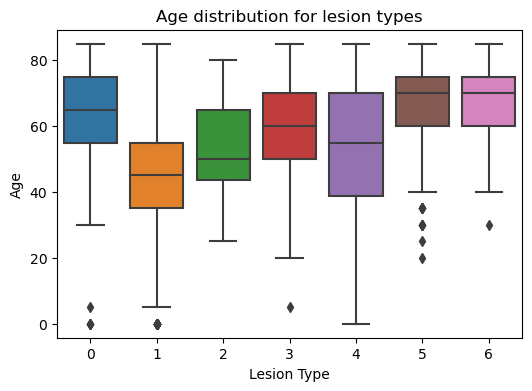

In [17]:
#Create a box plot of age distribution for each lesion type
plt.figure(figsize=(6,4))
sns.boxplot(x='lesion_type', y='age', data=df)
plt.title('Age distribution for lesion types')
plt.xlabel('Lesion Type')
plt.ylabel('Age')
plt.show()

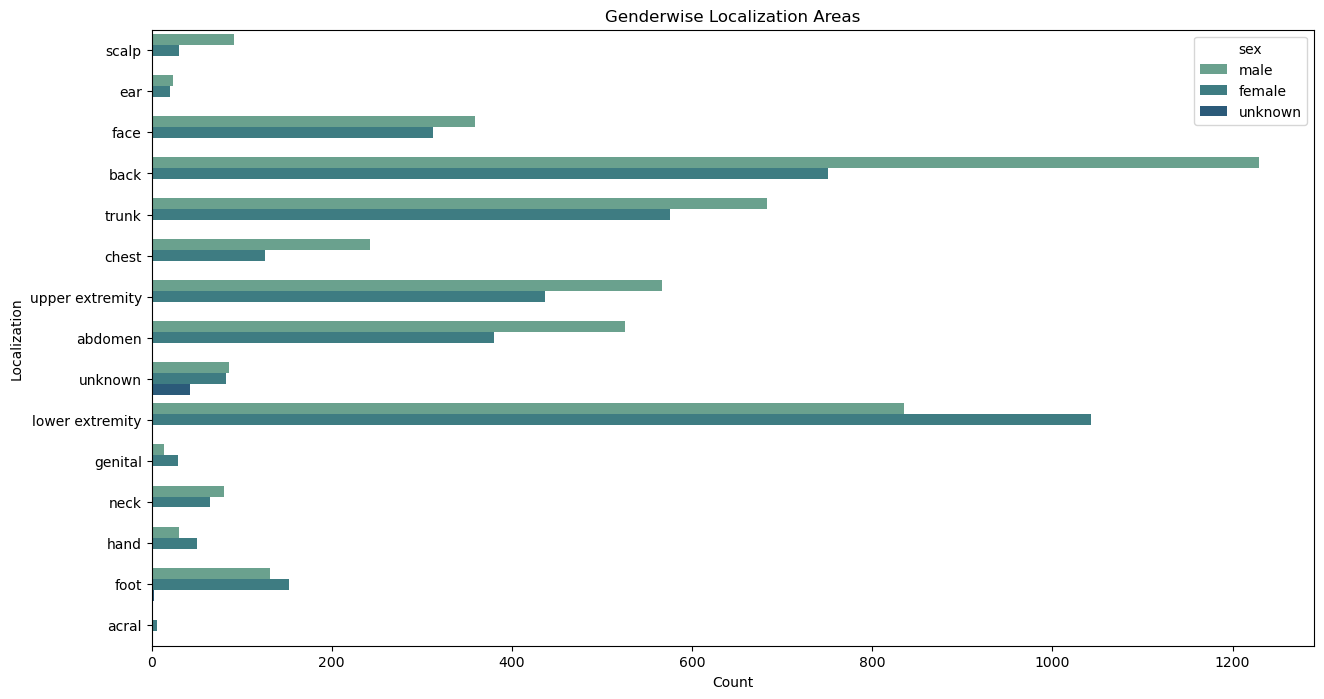

In [18]:
#Create a count plot of localization areas separated by gender
plt.figure(figsize=(15,8))
sns.countplot(data=df, y='localization', hue='sex', palette = 'crest')
plt.title('Genderwise Localization Areas')
plt.xlabel('Count')
plt.ylabel('Localization')
plt.show()

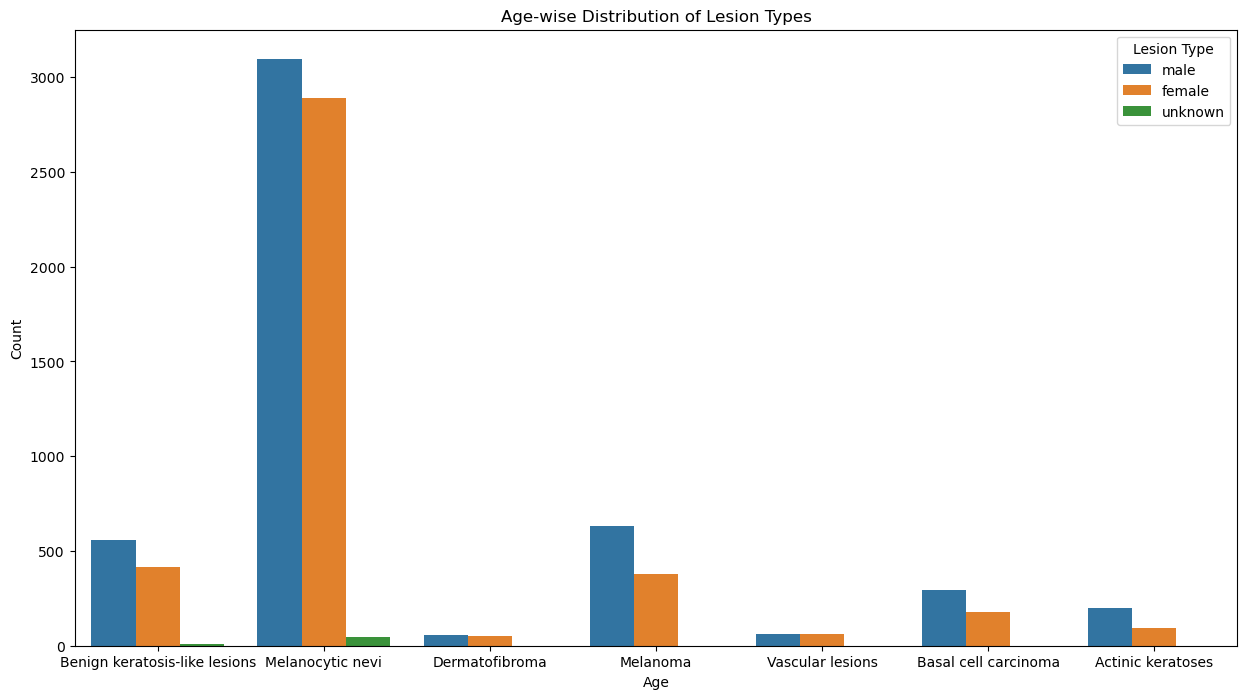

In [19]:
#Create a count plot of lesion types separated by gender
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='lesion_name', hue='sex')
plt.title('Age-wise Distribution of Lesion Types')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Lesion Type', loc='upper right')
plt.show()

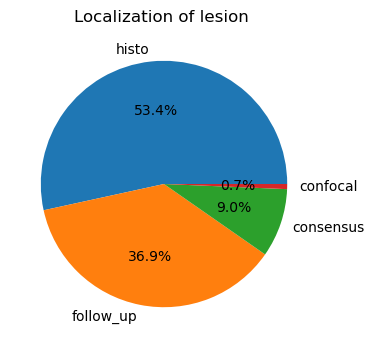

In [20]:
#Create a pie chart of lesion localizations
localization = df['confirmation'].value_counts()
plt.figure(figsize=(8,4))
plt.pie(localization, labels=localization.index, autopct='%1.1f%%')
plt.title('Localization of lesion ')
plt.show()

In [21]:
#Apply label encoding to categorical features
label_to_encode = ['confirmation','localization','sex']
label_encoder = LabelEncoder()
for attribute in label_to_encode:
    label_encoder.fit(df[attribute])
    df[attribute] = label_encoder.transform(df[attribute])
df

,image_id,lesion_type,confirmation,age,sex,localization,lesion_name,image_path
0,IMAGE_0000244,0,3,80.0,1,11,Benign keratosis-like lesions,/Users/arberite/Desktop/Assigment/dataset/imag...
1,IMAGE_0001916,0,3,80.0,1,11,Benign keratosis-like lesions,/Users/arberite/Desktop/Assigment/dataset/imag...
2,IMAGE_0006461,0,3,80.0,1,11,Benign keratosis-like lesions,/Users/arberite/Desktop/Assigment/dataset/imag...
3,IMAGE_0003197,0,3,80.0,1,11,Benign keratosis-like lesions,/Users/arberite/Desktop/Assigment/dataset/imag...
4,IMAGE_0009907,0,3,75.0,1,4,Benign keratosis-like lesions,/Users/arberite/Desktop/Assigment/dataset/imag...
...,...,...,...,...,...,...,...,...
10009,IMAGE_0006958,6,3,75.0,0,9,Actinic keratoses,/Users/arberite/Desktop/Assigment/dataset/imag...
10010,IMAGE_0007158,6,3,40.0,1,0,Actinic keratoses,/Users/arberite/Desktop/Assigment/dataset/imag...
10011,IMAGE_0005939,6,3,40.0,1,0,Actinic keratoses,/Users/arberite/Desktop/Assigment/dataset/imag...
10012,IMAGE_0001721,6,3,40.0,1,0,Actinic keratoses,/Users/arberite/Desktop/Assigment/dataset/imag...


In [22]:
#Features for correlation analysis
selected_variables = ['lesion_type', 'confirmation', 'age', 'sex', 'localization']
selected_data = df[selected_variables]
correlation_matrix = selected_data.corr()

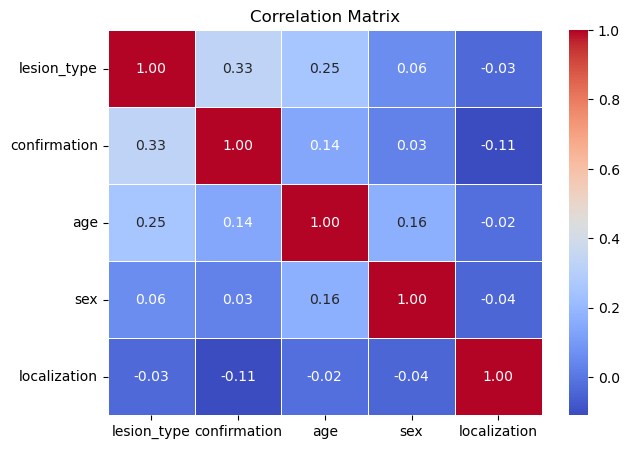

In [23]:
#Seaborn heatmap function to visualize the correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [37]:
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("PIL version:", PIL.__version__)

Pandas version: 1.5.3
Numpy version: 1.24.3
Matplotlib version: 3.7.1
Seaborn version: 0.12.2
Scikit-learn version: 1.3.0
PIL version: 9.4.0
